In [1]:
from gerrychain import Graph
import json
import geopandas as gpd

In [2]:
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges

graph = Graph.from_json("../data/pa/PA_VTDs.json")

election = Election("SEN12", {"Dem": "USS12D", "Rep": "USS12R"})

initial_partition = Partition(
    graph,
    assignment="CD_2011",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("TOTPOP", alias="population"),
        "SEN12": election
    }
)

In [3]:
for district, pop in initial_partition["population"].items():
    print("District {}: {}".format(district, pop))

District 3: 705317
District 5: 706258
District 10: 705327
District 9: 705679
District 12: 705698
District 6: 705782
District 15: 705549
District 7: 706391
District 16: 705629
District 11: 705883
District 4: 705669
District 8: 705689
District 17: 705830
District 18: 705847
District 14: 705526
District 13: 705028
District 2: 705689
District 1: 705588


In [4]:
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

chain = MarkovChain(
    proposal=propose_random_flip,
    constraints=[single_flip_contiguous],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=1000
)

In [5]:
for partition in chain:
    print(sorted(partition["SEN12"].percents("Dem")))

[0.3939965795760288, 0.4075582940348155, 0.427856693075198, 0.43845789169859267, 0.44859507442064817, 0.45562985141089074, 0.46112300747692175, 0.4722449543958699, 0.4749233455536996, 0.5042059392595655, 0.505002022794258, 0.5120524365064261, 0.5170020396913225, 0.5769630056499988, 0.6890607811083572, 0.7164031002129045, 0.8408878021339727, 0.9132545473358428]
[0.3939965795760288, 0.4075582940348155, 0.427856693075198, 0.43845789169859267, 0.44859507442064817, 0.45562985141089074, 0.46112300747692175, 0.4722449543958699, 0.4749233455536996, 0.5042059392595655, 0.5052716151390395, 0.511767479440001, 0.5170020396913225, 0.5769630056499988, 0.6890607811083572, 0.7164031002129045, 0.8408878021339727, 0.9132545473358428]
[0.3937004125652807, 0.4075582940348155, 0.427856693075198, 0.43845789169859267, 0.44859507442064817, 0.45578654699416454, 0.46112300747692175, 0.4722449543958699, 0.4749233455536996, 0.5042059392595655, 0.5052716151390395, 0.511767479440001, 0.5170020396913225, 0.576963005

In [6]:
import pandas

d_percents = [sorted(partition["SEN12"].percents("Dem")) for partition in chain]

data = pandas.DataFrame(d_percents)

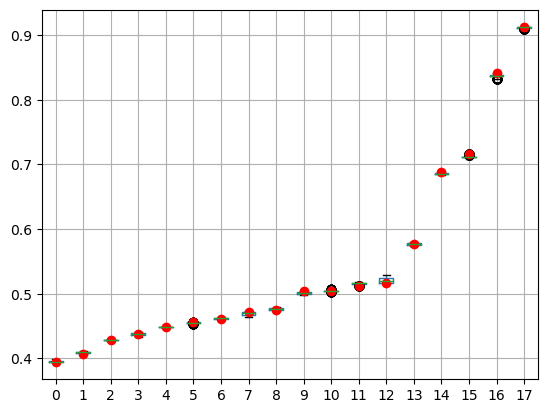

In [7]:
import matplotlib.pyplot as plt

ax = data.boxplot(positions=range(len(data.columns)))
plt.plot(data.iloc[0], "ro")

plt.show()